# Understanding Principal Component Analysis

**Outline**

* [Introduction](#intro)
* [Assumption and derivation](#derive)
* [PCA Example](#example)
* [PCA Usage](#usage)

In [32]:
%load_ext watermark
%matplotlib inline
# %config InlineBackend.figure_format='retina'

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

%watermark -a 'Johnny' -d -t -v -p numpy,pandas,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Johnny 2018-11-24 17:26:10 

CPython 3.6.3
IPython 6.1.0

numpy 1.13.3
pandas 0.20.3
matplotlib 2.1.0
sklearn 0.19.1


---

## <a id="intro">Introduction</a>

When we have two features that are highly correlated with each other, we may not want to include both of them in our model. In [Lasso and Ridge regression](http://nbviewer.jupyter.org/github/johnnychiuchiu/Machine-Learning/blob/master/LinearRegression/linearRegressionModelBuilding.ipynb#ridge), what it does is fitting a model with all the predictors but put a penalized term, either L1 or L2 norm on the value of the regression coefficients, this will shrinks the coefficient estimates towards zero. In other words, it try to pick some predictors out of all the predictors in order to reduce the dimension of our column space.

Principal Component Analysis(PCA) is another type of dimension reduction method. What PCA is all about is **Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.** The main idea and motivation is that each of the $n$ observations lives in $p$-dimensional space, but not all of these dimensions are equally interesting. PCA seeks a small number of dimensions that are as intersteing as possible. The concept of *interesting* is measured by the amount that the observations vary along each dimension.

Note that PCA is just a linear transformation method. Compared to the original space, it can project our high-dimensional data into another dimension, of which each of the direction are with the maximum variance. In other words, the orthogonality of principal components implies that PCA finds the most uncorrelated components to explain as much variation in the data as possible. We can then pick the number of directions, i.e. components, we want to keep while containing most of the information of the original data. The direction of the highest variance is called the first principal component, the second highest is call the second principal component, and so on.

In PCA, we found out that the first principal component is obtained by doing eigendecomposition of the covariance matrix X, and the eigenvector with the largest eigenvalue is our first principal component in the sense that every vector in the span of this eigenvector will strech out by the largest amount, since eigenvalues are the factors by which the eigenvectors streckes or squishes during the transformation. Therefore, we can sort the top k component by the value of the eigenvalues that we found from doing eigendecomposition of the covariance matrix X.

**Application of PCA**

* We can use PCA as a tool for data visualization. For instance, if we can obtain a two-dimensional representation of the data that captures most of the information, then we can plot hte observations in this low-dimensional space.
* We can use princial components as predictors in a regression model in place of the original larger set of variables.




---

## <a id="derive">Assumption and derivation</a>

**Assumption** for PCA before we derive the whole process are
* Since we are only interested in variance, we assume that each of the variables in $X$ has been and should be centered to have mean zero, i.e. the column means of $X$ are zero.

**Method Derivation**

Assume we have n observation, and a set of features $X1, X2, X3, \dots, Xp$. In order words, we have

\begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n,1} & x_{n,2} & \cdots & x_{n,p} 
\end{pmatrix}

where 

\begin{equation*}
X1 = \begin{bmatrix}
       x_{1,1} \\
       x_{2,1} \\
       \vdots \\
       x_{n,1}        
     \end{bmatrix}
\end{equation*}
  

PCA will try to find a low dimensional representation of a dataset that contains as much as possible of the variance. The idea is that each of the n observations lives in p-dimensional space, but not all of these dimensions are equally interesting. PCA seeks a small number of dimensions that are as interesting as possible. Let see how these dimensions, or *principal component* are found.

Given $n \times p$ data set $X$, how do we compute the first principal component? We look for the linear combination of the sample feature values of the form

$$z_{i,1} = \phi_{1,1}x_{i,1}+\phi_{2,1}x_{i,2}+\dots+\phi_{p,1}x_{i,p}$$
where
0<i<n and $\phi_1$ denotes the first principal component loading vector, which is

\begin{equation*}
    \phi_1=\begin{pmatrix}
       \phi_{1,1} \\
       \phi_{2,1} \\
       \vdots \\
       \phi_{p,1}        
     \end{pmatrix}
\end{equation*} 

We'll have n values of $z_1$, and we want to look for the linear combination that has the largest sample variance. More formally,

\begin{equation*}
Z_1
=
\begin{pmatrix}
       z_{1,1} \\
       z_{2,1} \\
       \vdots \\
       z_{n,1}        
     \end{pmatrix}
= 
\begin{pmatrix}
  \phi_{1,1}x_{1,1} + \phi_{2,1}x_{1,2} + \cdots + \phi_{p,1}x_{1,p} \\
  \phi_{1,1}x_{2,1} + \phi_{2,1}x_{2,2} + \cdots + \phi_{p,1}x_{2,p} \\
  \vdots  \\
  \phi_{1,1}x_{n,1} + \phi_{2,1}x_{n,2} + \cdots + \phi_{p,1}x_{n,p} 
\end{pmatrix}
=
\begin{pmatrix}
       \phi_{1,1} 
       \phi_{2,1} 
       \dots 
       \phi_{p,1}        
     \end{pmatrix}
\begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n,1} & x_{n,2} & \cdots & x_{n,p} 
\end{pmatrix}
=
\phi_{1,1}X_{1}+\phi_{2,1}X_{2}+\dots+\phi_{p,1}X_{p}
=
\phi_1^T X
\end{equation*}

We assume that each of the variables in $X$ has been centered to have mean zero, i.e., the column means of $X$ are zero. Therefore, $E(X_i)=0$ for i in 1,...p. It's obvious to know that $E(Z_1)=E(\phi_{1,1}X_{1}+\phi_{2,1}X_{2}+\dots+\phi_{p,1}X_{p}) = 0$

Therefore, the variance of $Z_1$ is 

$$Var(Z_1) = E\Big[[Z_1-E(Z_1)][Z_1-E(Z_1)]^T\Big] = E\Big[Z_1 Z_1^T \Big] = E\Big[(\phi_1^T X) (\phi_1^T X)^T \Big] = E\Big[\phi_1^T X X^T \phi_1\Big] = \phi_1^T E[X X^T] \phi_1$$

We also know that the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) of X is

$$C = Cov(X) = E\Big[[X-E(X)][X-E(X)]^T\Big] = E[X X^T]$$

Hence, the $Var(Z_1)= \phi_1^T E[X X^T] \phi_1 = \phi_1^T C \phi_1$

Apart from finding the largest sample variance, we also constrain the loadings so that their sum of squares is equal to one, since otherwise setting these elements to be arbitrarily large in absolute value could result in an arbitrarily large variance. More formally,

$$\sum_{j=1}^{p}\phi_{j1}^2=1$$

In other words, the first principal component loading vector solves the optimization problem

$$\text{maximize}_\phi \quad \phi^TC\phi$$
$$\text{subject to} \sum_{j=1}^{p}\phi_{j1}^2 = \phi_1^T \phi_1 =1$$


This objective function can be solved by the Lagrange multiplier, minimizing the loss function:

$$L = \phi^T C\phi - \lambda(\phi^T \phi-1)$$

Next, to solve for $\phi$, we set the partial derivative of L with respect to $\phi$ to 0.

$$\frac{\partial L}{\partial \phi_1} = C\phi - \lambda \phi_1 =0 $$
$$ C\phi_1 = \lambda \phi_1 $$

Surprisingly we see that it is actually a eigendecomposition problem. To refresh our mind a little bit, here is a very good [youtube video](https://www.youtube.com/watch?v=PFDu9oVAE-g&index=14&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) explaining what eigenvalue and eigenvector is in a very geometrical way.

Therefore, from the equation above, we pick $\phi$ as the eigenvector associated with the largest eigenvalue.

Also, most data can’t be well-described by a single principal component. Typically, we compute multiple principal components by computing all eigenvectors of the covariance matrix of $X$ and ranking them by their eigenvalues. After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

To sum up, here are the **steps that we take to perform a PCA analysis**
1. Standardize the data.
2. Obtain the Eigenvectors and Eigenvalues from the covariance matrix (technically the correlation matrix after performing the standardization).
3. Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace.
4. Projection onto the new feature space. During this step we will take the top k eigenvectors and use it to transform the original dataset X to obtain a k-dimensional feature subspace X′.

---

## <a id="process">PCA Analysis Example</a>

Let's use the classical IRIS data to illustrate the topics that we just covered, including
* What are the explained variance of each component? How many component should we pick?
* How will the scatter plot be if we plot in the dimension of first and second component?

In [2]:
# Read Data
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# split data table into data X and class labels y
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

**EDA**

To get a feeling for how the 3 different flower classes are distributes along the 4 different features, let us visualize them via histograms.

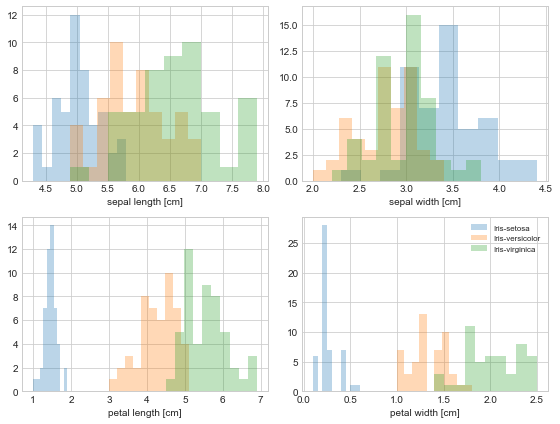

In [4]:
def plot_iris():
    label_dict = {1: 'Iris-Setosa',
                  2: 'Iris-Versicolor',
                  3: 'Iris-Virgnica'}

    feature_dict = {0: 'sepal length [cm]',
                    1: 'sepal width [cm]',
                    2: 'petal length [cm]',
                    3: 'petal width [cm]'}

    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(8, 6))
        for cnt in range(4):
            plt.subplot(2, 2, cnt+1)
            for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
                plt.hist(X[y==lab, cnt],
                         label=lab,
                         bins=10,
                         alpha=0.3,)
            plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)

        plt.tight_layout()
        plt.show()
        
plot_iris()     

## Process

### 1. Standardize the data

In [17]:
# create a StandardScaler object
scaler = StandardScaler()
# fit and then transform to get the standardized dataset
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
X_std = scaler.transform(X)

### 2. Do eigendecomposition and sort eigenvalues in descending order

In [21]:
# n_components: Number of components to keep
# if n_components is not set all components are kept
my_pca = PCA(n_components=None) 
my_pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
def plot_var_explained(var_exp, figsize=(6,4)):
    """variance explained per component plot"""
    
    # get culmulative variance explained
    cum_var_exp = np.cumsum(var_exp)
    
    # plot
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=figsize)

        plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
                label='individual explained variance')
        plt.step(range(len(var_exp)), cum_var_exp, where='mid',
                 label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

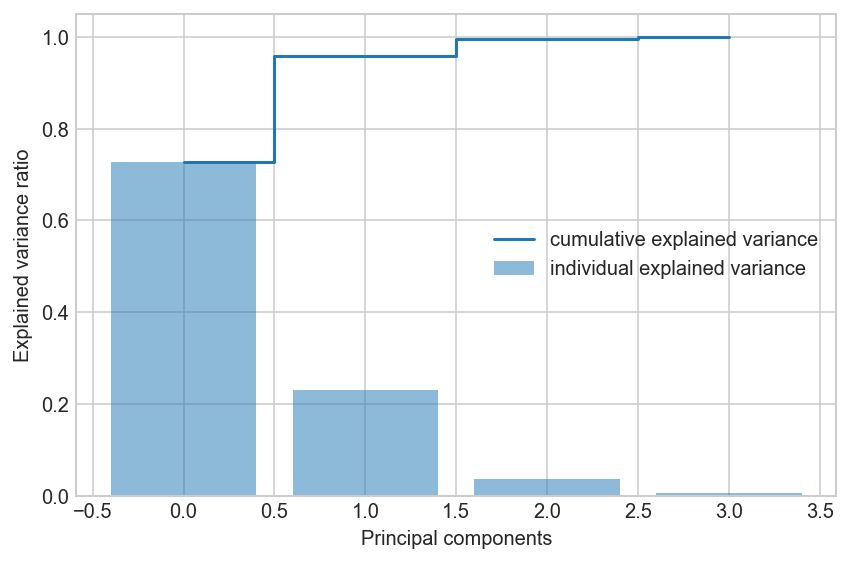

In [50]:
var_exp = my_pca.explained_variance_ratio_
plot_var_explained(var_exp, figsize=(6,4))

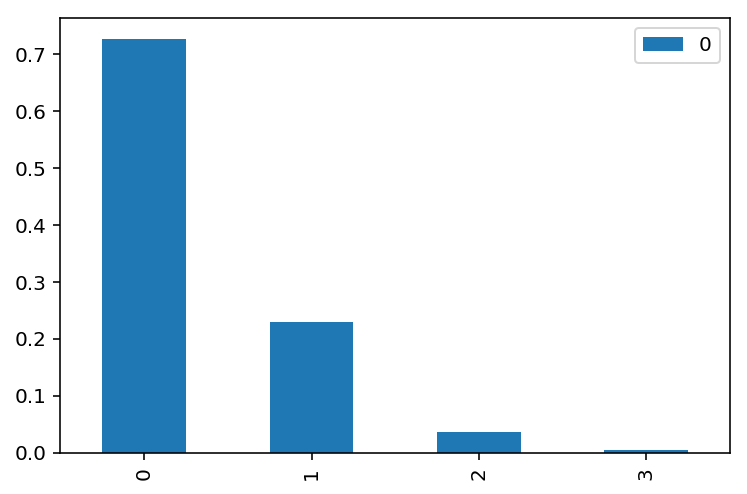

In [51]:
# plot a simpler version of the bar chart
pd.DataFrame(my_pca.explained_variance_ratio_).plot.bar()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

### 3. Check the scores within each principal component

In [54]:
PC_df = pd.DataFrame(my_pca.components_,columns=df.iloc[:,0:4].columns).transpose()
PC_df

,0,1,2,3
sepal_len,0.522372,0.372318,-0.721017,-0.261996
sepal_wid,-0.263355,0.925556,0.242033,0.124135
petal_len,0.581254,0.021095,0.140892,0.801154
petal_wid,0.565611,0.065416,0.633801,-0.523546


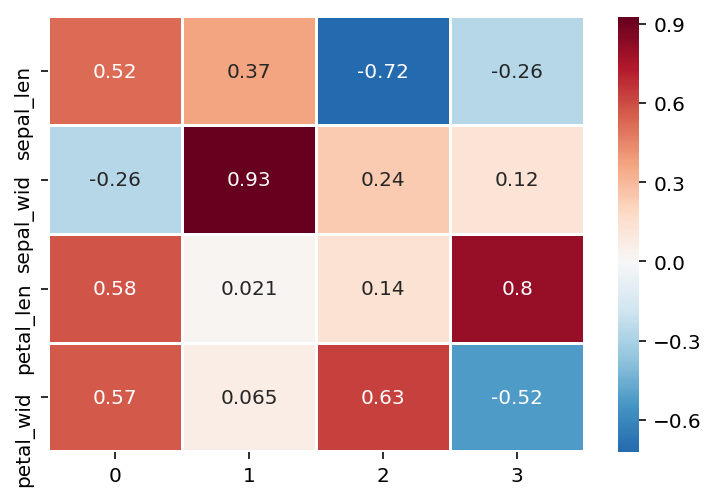

In [65]:
import seaborn as sns
plt.figure(figsize=None) #(4,4)
sns.heatmap(PC_df,cmap="RdBu_r",annot=PC_df.values, linewidths=1, center=0)

From the above heatmap & table, we can see that first component consist of all 4 features with a smaller weight on sepal_wid

### 4. Projection onto the new feature space
During this step we will take the top k eigenvectors and use it to transform the original dataset X to obtain a k-dimensional feature subspace X′.

In [8]:
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [9]:
Y_sklearn[1:10]

array([[-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ],
       [-2.07053681,  1.51854856],
       [-2.44571134,  0.07456268],
       [-2.23384186,  0.24761393],
       [-2.34195768, -1.09514636],
       [-2.18867576, -0.44862905]])

Each of the list in the array above shows the projected value of each observation onto the first two principal components. If we want to fit model using the data projected on to their first 2 principal component, then `Y_sklearn` is the data we want to use.

## <a id="usage">PCA Usage</a>

### Data Visualization

We can use PCA as a tool for data visualization. For instance, if we can obtain a two-dimensional representation of the data that captures most of the information, then we can plot hte observations in this low-dimensional space.

Let's see how it will be like using IRIS data if we plot it out in the first two principal components.

Iris-setosa
blue
Iris-versicolor
red
Iris-virginica
green


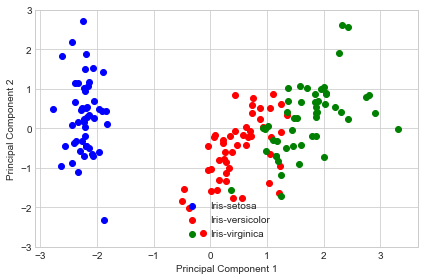

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        print(lab)
        print(col)
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### Principal Component Regression
We can use princial components as predictors in a regression model in place of the original larger set of variables.

Let's compare the result of logistic regression using all the features with the one using only the first two component

In [124]:
# the code is copied from Ethen's PCA blog post, which is listed in the reference.

# split 30% of the iris data into a test set for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1)

# create the pipeline, where we'll
# standardize the data, perform PCA and
# fit the logistic regression
pipeline1 = Pipeline([
    ('standardize', StandardScaler()),
    ('pca', PCA(n_components = 2)),
    ('logistic', LogisticRegression(random_state = 1))
])
pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)

# pipeline without PCA
pipeline2 = Pipeline([
    ('standardize', StandardScaler()),
    ('logistic', LogisticRegression(random_state = 1))
])
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)

# access the prediction accuracy
print('PCA Accuracy %.3f' % accuracy_score(y_test, y_pred1))
print('Accuracy %.3f' % accuracy_score(y_test, y_pred2))

PCA Accuracy 0.800
Accuracy 0.822


We saw that by using only the first two component, the accuracy only drop by 0.022, which is about 2-3% from the original accuracy. Actually, by using the first three principal component, we can get the same accuracy as the original model with all the features.

### Reference

* [PCA in 3 steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
* [Everything you did and didn't know about PCA
](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)
* [Ethen: Principal Component Analysis (PCA) from scratch](http://nbviewer.jupyter.org/github/ethen8181/machine-learning/blob/master/dim_reduct/PCA.ipynb)
* [Wiki: Matrix Multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication)
* [Sklearn: Pipelining: chaining a PCA and a logistic regression](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py)